# Aprendizaje supervisado - Regresión Logística
***

La idea ahora, que ya tenemos nuestra matriz de datos/características pre-procesada, es iniciar nuestro recorrido por los algoritmos de clasificación. Para ello contaremos con una base de datos muy conocida en el ML llamada Iris

## Iris
***

Esta base de datos continuene 50 muestras de 3 diferentes tipos de iris (150 muestras en total). Las características de cada una de las observaciones son: la longitud y el ancho del sépalo,  y la longitud y ancho del pétalo. El objetivo de ML con esta base de datos es predecir la especie de iris de acuerdo a sus medidas.

Las especies de irir son: Iris Setosa, Iris Versicolour, Iris Virginica.

![Iris](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

Para cargar la base de datos desde la librería scikit-learn utilizamos las siguientes instrucciones

In [3]:
from sklearn import datasets #la librería sklearn contiene las funciones 
#relacionadas con aprendizaje de máquina. Datasets incorpora bases de datos de 
#ejemplo
import numpy as np #importamos la librería numérica

In [4]:
iris = datasets.load_iris() #aquí cargamos los datos de la base de datos 
#en la variable iris.
X = iris.data #guardamos en la variable X la matriz de observaciones
y = iris.target #guardamos en la variable y el vector de etiquetas 
#(identifica cada fila de la matriz X con una clase específica de iris)
print(np.unique(y)) #imprimimos los valores del vector de etiquetas y
#que no se repitan
print(y.shape)

[0 1 2]
(150,)


## Regresión logística

Es un algoritmo simple pero potente para problemas de clasificación lineales y binarios. A pesar del nombre no es un modelo de regresión, es un modelo de clasificación.

La regresión logística es un modelo de clasificación muy simple de implementar y que funciona muy bien en clases linealmente separables. A nivel industrial es uno de los modelos más utilizados. 

Dado que es un clasificador binario, si se desea extender sus prestaciones a clasificación multiclase de debe utilizar la técnica OvR.

### Definiciones

Algunas definiciones importantes para entender este tipo de clasificadores son:

1. *Odds ratio o razón de momios:*
>La razón de momios  indica la probabilidad a favor de un evento particular, y puede ser escrita como $\frac{p}{1-p}$, donde $p$ denota la probabilidad del evento positivo. Siendo el evento positivo, el evento que queremos predecir.

2. *Función logit:*
>La función *logit* se define como el logaritmo de la razón de momios:

$$logit(p)=\log\frac{p}{1-p}$$

 La función *logit* toma valores de entrada en el rango de 0 a 1 y los transofrma que números reales, con lo que se puede expresar la siguiente relación lineal entre las características y estos valores.

$$logit(P(y=1|\mathbf{x}))=w_0x_0+w_1x_1+\ldots+w_px_p= \sum_{j=0}^{p}w_jx_j=\mathbf{w}^{\top}\mathbf{x}$$

### Funcionamiento

La probabilidad de que cierta muestra pertenezca a una clase particular, que es el objeto de nuestro interés,  es la forma inversa de la función *logit*. Esta función es llamada *función logística* o *sigmoid*, y se define como:

$$\phi(z)=\frac{1}{1+e^{-z}}$$

En este caso $z$ es la red de entrada, i.e., la combinación lineal de l os pesos y las características, $z=\mathbf{w}^{\top}\mathbf{x}$. 

La función sigmoide se verá de la siguiente manera:

In [6]:
import matplotlib.pyplot as plt #importamos la librería para graficar
import math #importamos la librería que tiene las funciones matemáticas
#avanzadas

#ahora definiremos una función que represente el sigmoide
def sigmoide(z): #definimos la función con nombre sigmoide. El argumento
    #de entrada será la variable z
    funcion_sigmoide = 1.0/(1.0+np.exp(-z)) #esta es la definición matemática 
    #de la función sigmoide
    return funcion_sigmoide #retornamos la función evaluada en z

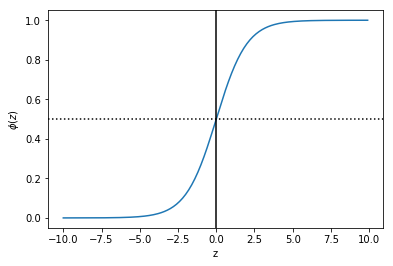

In [7]:
#para probarla debemos generar una  malla de valores en z (una matriz)
z = np.mgrid[-10:10:0.1]#-10 y 10 son unos valores para visualizar
fi = sigmoide(z) #llamamos la función, la evaluamos en z y la almacenamos
#en la variable fi
plt.plot(z,fi) #graficamos z vs fi
plt.axvline(0,0,color='k') #aquí graficamos una línea vertical que cruza por
#(0,0) de color negro (k)
plt.axhline(y=0.5, ls='dotted', color='k') #aquí graficamos una línea
#horizontal que cruza por y=0.5, es punteada y de color negro
plt.ylabel('$\phi(z)$') #nombre del eje y. Los signos de $ es para que 
#se vea la variable phi
plt.xlabel('z') #nombre del eje x
plt.show() #mostramos la figura


La salida de la función *sigmoide* $\phi(z) = P(y=1|\mathbf{x};\mathbf{w})$ puede ser interpretada como la probabilidad de una observación particual de pertenecer a la clase 1, dadas sus características $\mathbf{x}$ parametrizadas por los pesos $\mathbf{w}$.

*Ejemplo*

Si calculamos $\phi = 0.8$ para una muestra  determinada en la base de datos Iris, significa que la probabilidad de que sea una Iris Versicolour es del 80%. Similarmente, para una Iris Setosa puede calcularse así: 

$$P(y=0|\mathbf{x};\mathbf{w})=1-P(y=1|\mathbf{x};\mathbf{w})=0.2 $$

La probabilidad de  salida se puede convertir en una salida binaria a través de un cuantizador (una función de escalón unitario):

$$ \hat{y}=\left\{\begin{array}{cc}
1& \phi(z)\leq 0.5\\
0& otros
\end{array}\right.$$

###  Sintonización de parámetros

Para la sintonización o el cálculo de los pesos $w$, se debe tener en cuenta la función de costo que se desea minimizar o maximizar. En nuestro caso la función de costo es el error cuadrático medio:

$$J(\mathbf{w})=\frac{1}{2}\sum_{i}(\phi(z_i)-y_i)^2$$

Este error corresponde a la diferencia que hay entre la clase estimada y la etiqueta real de cada observación. Ahora bien, la minimización de la función de costos implica la maximización de la función de verosimilitud, definida como:

$$L(\mathbf{w}) = P(\mathbf{y}|\mathbf{x};\mathbf{w})=\prod_{i=1}^{n}P(y_i|x_i;\mathbf{w})=\prod_{i=1}^{n}(\phi(z_i))^{y_i}(1-\phi(z_i))^{1-y_i}$$

Dado que es más fácil maximizar el logaritmo de la función de verosimilitud, tenemos que:

$$l(\mathbf{w})=\log(L(\mathbf{w}))=\sum_{i=1}^{n}[y_i\log(\phi(z_i))+(1-y_i)\log(1-\phi(z_i))]$$

Ahora bien, podemos usar un algoritmo como gradiente ascendente para maximizar la función de verosimilitud o minimizarla a través de gradiente descendente. Para la minimización tendremos que la función de costos debe ser:

$$J(\mathbf{w})= \sum_{i=1}^{n}[-y_i\log(\phi(z_i))-(1-y_i)\log(1-\phi(z_i))]$$


## Implementación

Para implementar nuestro clasificador, utilizaremos el modelo de la librería scikit-learn sobre la base de datos Iris. Primero debemos importar el clasificador y organizar los datos.

In [8]:
from sklearn.linear_model import LogisticRegression #llamamos la librería
#linear_model perteneciente a sklearn, donde se encuentran los modelos
#lineales como Regresión logística. 
from sklearn.model_selection import train_test_split # con esta librería
#podemos dividir nuestra base de datos en entrenamiento y validación


#primero hacemos nuestra partición de la DB.
# En este caso el 0.3 corresponde al 30% de las obervaciones de la
#base de datos que se tomarán como test o validación, mientras el 70%
#restante se tomará como entrenamiento (los datos con los que le enseñamos
#a la máquina)
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)
#print (X_train.shape)
#print (X_test.shape)

#print(length(y_train))
#print(length(y_test))

**Ejercicio 1**

Define y aplica una función para normalizar (preprocesar) el conjunto de entrenamiento y el conjunto de validación utilizando la media y la desviación estándar, de tal forma que :

media_X_train = X_train.mean(axis = 0)

desviacion_X_train = X_train.std(axis = 0)

X_train_normalizado = (X_train - media_X_train)/desviacion_X_train

X_test_normalizado  = (X_test -  media_X_train)/desviacion_X_train


In [9]:
#espacio para solucionar el ejercicio 1
def Remocion(X): #definimos la función
    X = X - X.mean(axis=0) # a los datos les restamos el valor de la media
    X = X/X.std(axis=0) #al resultado lo dividimos por la desviación estándar
    return X #retornamos los datos normalizamos

def remocion_train_test(X_train,X_test):
    media_train = X_train.mean(axis = 0) # calculamos la media del conjunto de entrenamiento
    desviacion_train = X_train.std(axis = 0) # calculamos la desviacion estándar del conjunto de entrenamiento
    
    X_train_normalizado = (X_train - media_train)/desviacion_train # preprocesamos la matriz de entrenamiento
    X_test_normalizado = (X_test - media_train)/desviacion_train # preprocesamos la matriz de validacion o test
    
    return X_train_normalizado, X_test_normalizado

X_train_normalizado, X_test_normalizado = remocion_train_test(X_train, X_test)
print(type(X_train_normalizado))


<class 'numpy.ndarray'>


Ahora entrenamos el clasificador:

In [17]:
#instanciamos el clasificador, valores pequeños de C especifican
# mayor regularización
clasificador = LogisticRegression(C=1000.0, random_state = 0) 
# entrenamos el clasificador con los datos X_train_normalizado
clasificador.fit(X_train_normalizado,y_train)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Realizamos el test o la validación con los datos que el clasificador no 
#conoce, que corresponden al X_test_normalizado
y_pred = clasificador.predict(X_test_normalizado)
# comparamos las etiquetas de la base de datos con las que encontró
# el clasificador para así fijar el error de clasificación
print('Las muestras mal clasificadas fueron %d' % (y_test != y_pred).sum())

Las muestras mal clasificadas fueron 1


**Ejercicio 2**

Repite el procedimiento anterior pero con la normalización del escalamiento

$$\frac{\mathbf{X}-min(\mathbf{X})}{max(\mathbf{X})-min(\mathbf{X})}$$

In [19]:
# espacio para solucionar el ejercicio 2
def Escalamiento(X): #definimos la función de escalamiento
    minimo = X.min(axis=0) #calculamos el mínimo valor de cada columna
    maximo = X.max(axis=0) #calculamos el máximo valor de cada columna
    X = (X-minimo)/(maximo-minimo) #aplicamos la fórmula del escalamiento
    return(X) #retornamos el valor

def escalamiento_train_test(X_train,X_test):
    minimo_train = X_train.min(axis=0)
    maximo_train = X_train.max(axis=0)
    
    X_train_preprocesado = (X_train - minimo_train)/(maximo_train - minimo_train)
    X_test_preprocesado = (X_test - minimo_train)/(maximo_train - minimo_train)
    
    return X_train_preprocesado, X_test_preprocesado
   
X_train_preprocesado, X_test_preprocesado = escalamiento_train_test(X_train,X_test)

#instanciamos el clasificador, valores pequeños de C especifican
# mayor regularización
clasificador = LogisticRegression(C=1000.0, random_state = 0) 
# entrenamos el clasificador con los datos X_train_normalizado
clasificador.fit(X_train_preprocesado,y_train)

#Realizamos el test o la validación con los datos que el clasificador no 
#conoce, que corresponden al X_test_normalizado
y_pred = clasificador.predict(X_test_preprocesado)
# comparamos las etiquetas de la base de datos con las que encontró
# el clasificador para así fijar el error de clasificación
print('Las muestras mal clasificadas fueron %d' % (y_test != y_pred).sum())
print(len(y_test))

Las muestras mal clasificadas fueron 1


**Ejercicio 3**

Realiza un código para la comparación de los resultados de los dos preprocesamientos pero con respecto al porcentaje de acierto de clasificación.

In [22]:
#espacio para solucionar el ejercicio 3
print('Las muestras bien clasificadas fueron %d' % (y_test == y_pred).sum())
print(len(y_test))
print((100*(y_test == y_pred).sum())/len(y_test))

Las muestras bien clasificadas fueron 44
45
97.7777777778
